<a href="https://colab.research.google.com/github/ankit3466/Deep-Learning/blob/master/rock_paper_scissor_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2019-12-20 14:11:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   186MB/s    in 1.0s    

2019-12-20 14:11:09 (186 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2019-12-20 14:11:13--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/t

In [0]:
# Unziping the data
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [14]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock02-095.png', 'rock01-095.png', 'rock03-040.png', 'rock06ck02-005.png', 'rock06ck02-028.png', 'rock03-114.png', 'rock05ck01-079.png', 'rock01-033.png', 'rock03-041.png', 'rock04-119.png']
['paper02-040.png', 'paper05-092.png', 'paper07-022.png', 'paper06-016.png', 'paper06-032.png', 'paper05-086.png', 'paper06-067.png', 'paper04-023.png', 'paper07-106.png', 'paper02-074.png']
['scissors01-068.png', 'scissors03-086.png', 'scissors04-057.png', 'scissors03-116.png', 'testscissors03-058.png', 'scissors02-027.png', 'scissors04-072.png', 'testscissors02-034.png', 'testscissors01-081.png', 'testscissors03-086.png']


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
from PIL import Image
import cv2

(300, 300, 3)

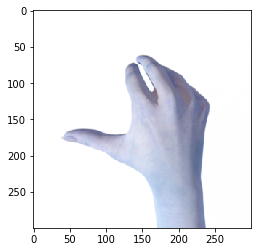

In [16]:
plt.imshow(cv2.imread(os.path.join(rock_dir,rock_files[1])))

i = cv2.imread(os.path.join(rock_dir,rock_files[1]))
i.shape

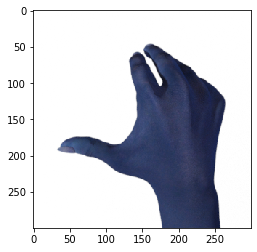

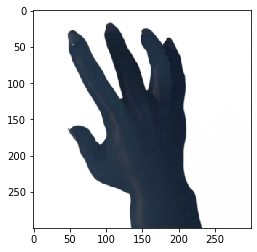

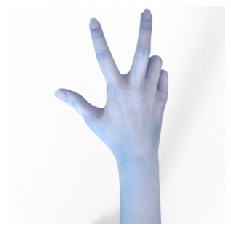

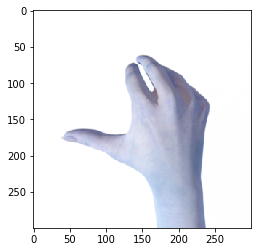

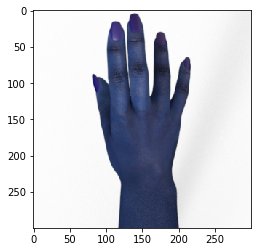

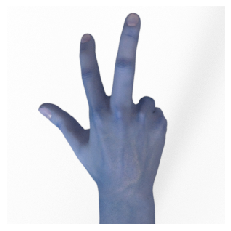

In [17]:

for i in range(2):
  plt.imshow(cv2.imread(os.path.join(rock_dir,rock_files[i])))
  plt.show()
  plt.imshow(cv2.imread(os.path.join(paper_dir,paper_files[i])))
  plt.show()
  plt.imshow(cv2.imread(os.path.join(scissors_dir,scissors_files[i])))
  plt.axis('off')
  plt.show()

In [0]:
rock = []
for i in range(840):
  img = cv2.imread(os.path.join(rock_dir,rock_files[i]))
  rock.append(img)

In [19]:
len(rock)

840

In [20]:
import numpy as np

print(type(rock))
rock = np.asarray(rock)
print(type(rock))
len(rock)

<class 'list'>
<class 'numpy.ndarray'>


840

In [21]:
paper = []
for i in range(840):
  img = cv2.imread(os.path.join(paper_dir,paper_files[i]))
  paper.append(img)

print(type(paper))
paper = np.asarray(paper)
print(type(paper))
len(paper)

<class 'list'>
<class 'numpy.ndarray'>


840

In [22]:
scissors = []
for i in range(840):
  img = cv2.imread(os.path.join(scissors_dir,scissors_files[i]))
  scissors.append(img)

print(type(scissors))
scissors = np.asarray(scissors)
print(type(scissors))
len(scissors)

<class 'list'>
<class 'numpy.ndarray'>


840

In [23]:
x = []
labels = []
for i in range(840):
  x.append(rock[i])
  x.append(paper[i])
  x.append(scissors[i])

  labels.append(0)
  labels.append(1)
  labels.append(2)

x = np.asarray(x)
labels = np.asarray(labels)

print(type(x) , type(labels))
print(len(x) , len(labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
2520 2520


In [24]:
labels.shape

(2520,)

In [27]:
labels = keras.utils.to_categorical(labels)
labels.shape

(2520, 3)

In [26]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [28]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [30]:
model.fit(x,labels,batch_size=250,epochs=10,verbose=1)

Train on 2520 samples
Epoch 1/10
2520/2520 [==============================] - 114s 45ms/sample - loss: 945.3836 - acc: 0.3444
Epoch 2/10
2520/2520 [==============================] - 111s 44ms/sample - loss: 1.1539 - acc: 0.4532
Epoch 3/10
2520/2520 [==============================] - 108s 43ms/sample - loss: 0.9099 - acc: 0.5746
Epoch 4/10
2520/2520 [==============================] - 107s 42ms/sample - loss: 1.4041 - acc: 0.5706
Epoch 5/10
2520/2520 [==============================] - 107s 42ms/sample - loss: 0.8428 - acc: 0.7194
Epoch 6/10
2520/2520 [==============================] - 107s 42ms/sample - loss: 4.4783 - acc: 0.6389
Epoch 7/10
2520/2520 [==============================] - 109s 43ms/sample - loss: 1.2097 - acc: 0.6579
Epoch 8/10
2520/2520 [==============================] - 108s 43ms/sample - loss: 0.1960 - acc: 0.9250
Epoch 9/10
2520/2520 [==============================] - 108s 43ms/sample - loss: 0.1781 - acc: 0.9294
Epoch 10/10
2520/2520 [==============================] - 1

In [0]:
# Now we can apply the same preprocessing step on our tets dataset and evaluate and predict our data.